# Introduction


In [1]:
# Import necessary modules
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import display, Math
#set plot resolution
%config InlineBackend.figure_format = 'retina'
# Gets rid of transparent border around images
plt.style.use('default')
# set default colormap
default_cmap = 'jet'
plt.set_cmap(cmap=default_cmap)
plt.close()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Spectral Estimation

What is the _resolution_ of data?

In the ideal case discrete data has infinite precision and equal time spacing


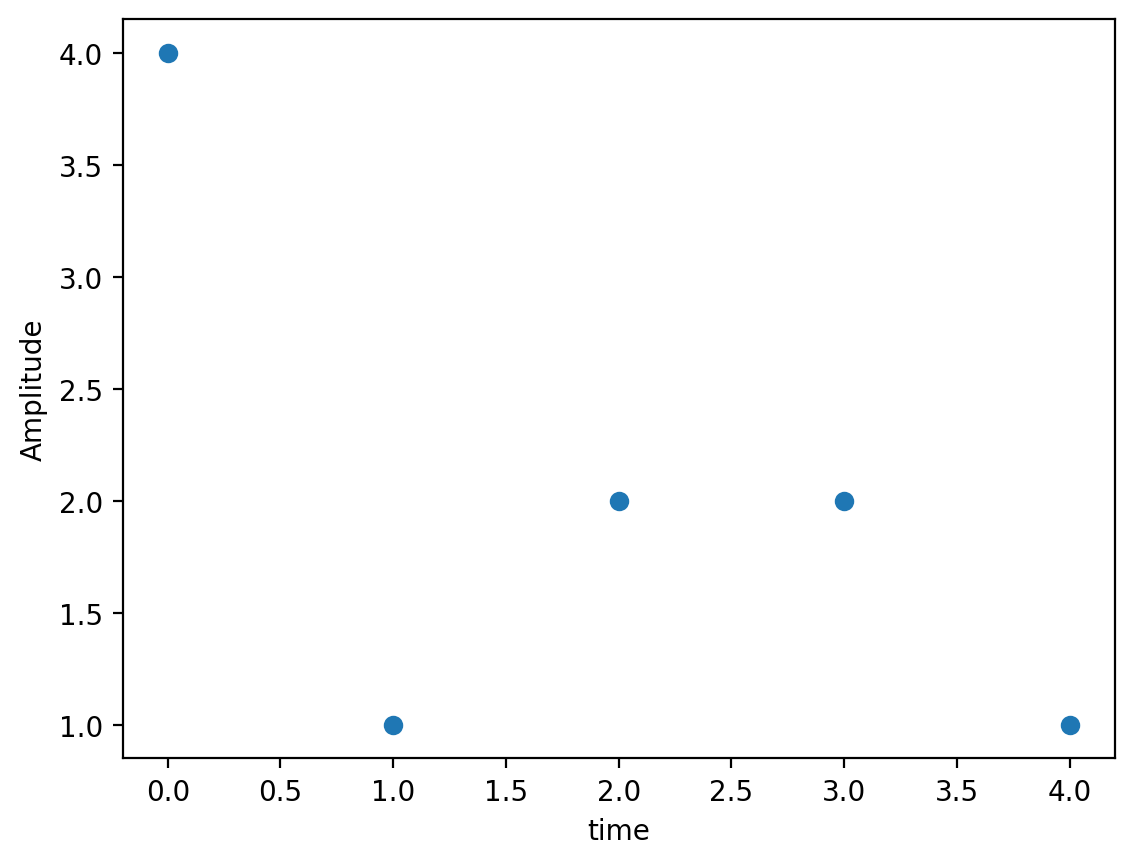

In [7]:
t = np.arange(0,5)
x = np.random.randint(0, 5, 5)

fig, ax = plt.subplots()
ax.plot(t, x, ls="", marker="o")
ax.set_xlabel("time")
ax.set_ylabel("Amplitude")
plt.show()

In reality data does not have infinite precision and the data should have error bars around it to show a certain amount of uncertainty in the data


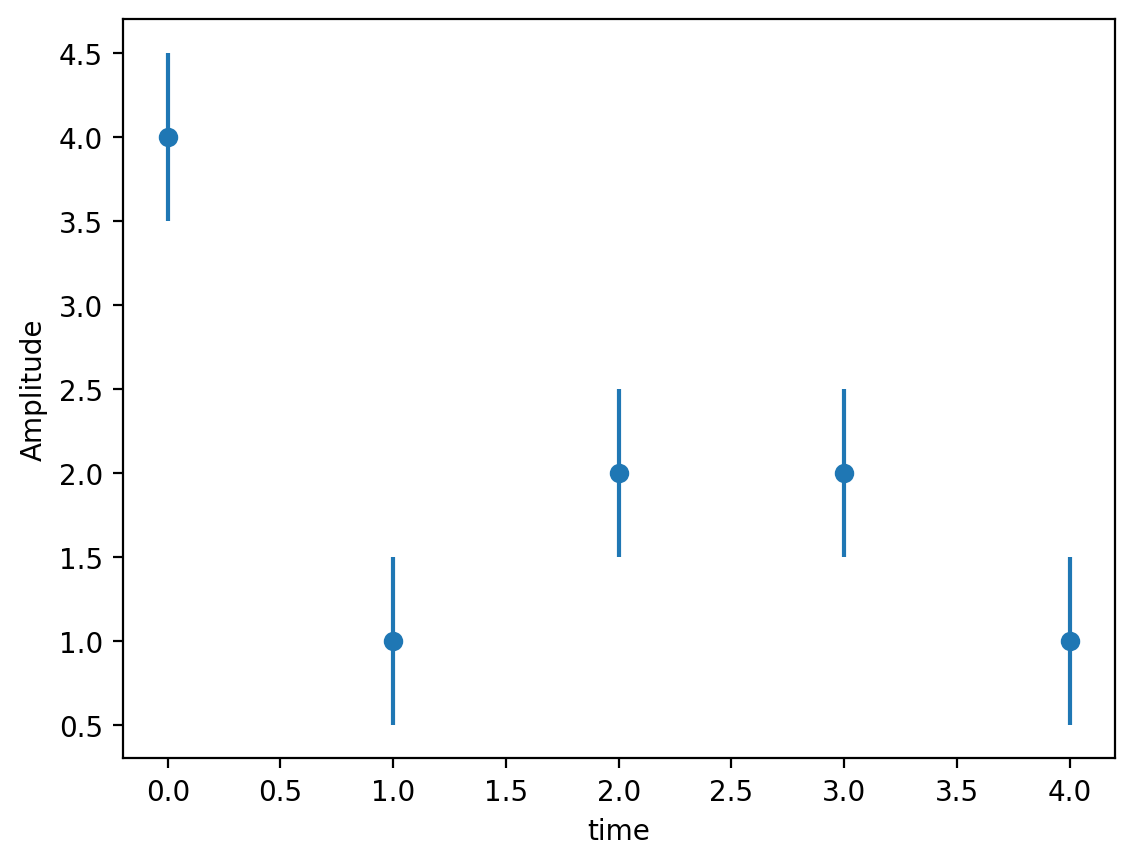

In [8]:
fig, ax = plt.subplots()
ax.errorbar(t, x, yerr=0.5, ls="", marker="o")
ax.set_xlabel("time")
ax.set_ylabel("Amplitude")
plt.show()

The data could be real or complex


### Issues with Spectral Estimation

- Frequency Resolution
- Signal detectable
- True spectral shapes
- Stability

In order to get an accurate picture we take multiple measurements


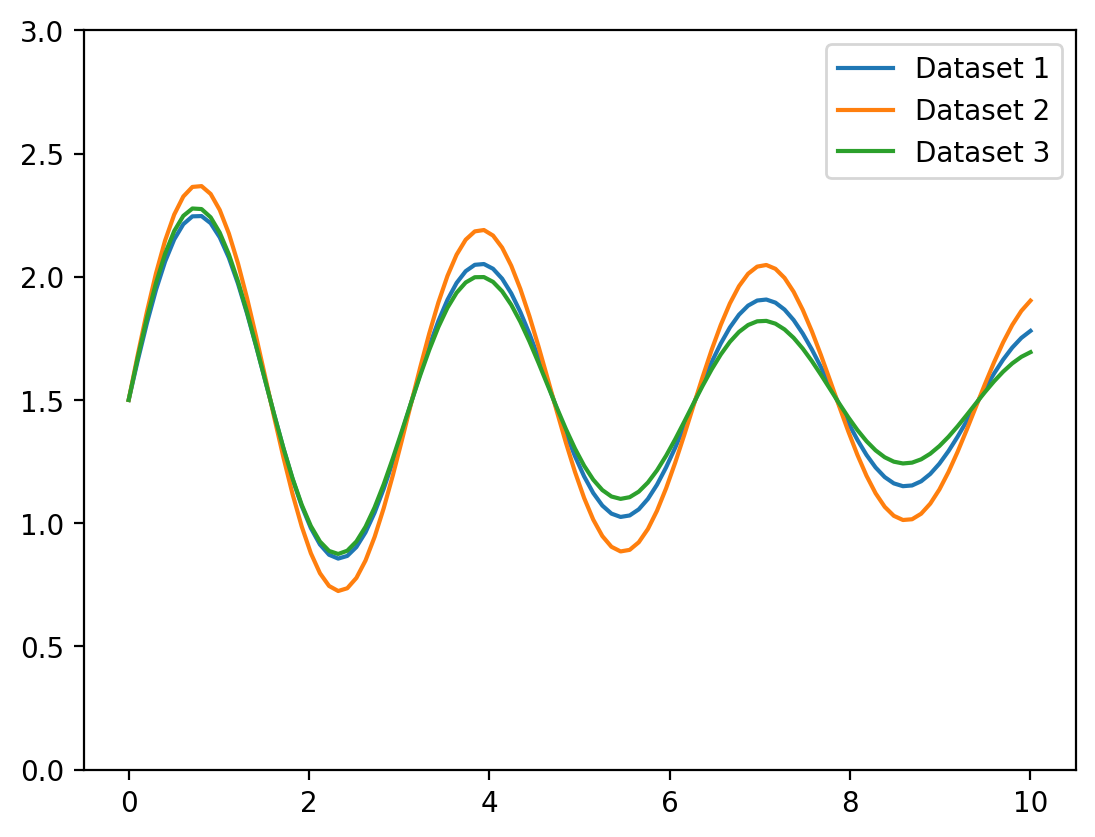

In [80]:
t = np.linspace(0, 10, 100)
x1 = np.load("x1.npy")
x2 = np.load("x2.npy")
x3 = np.load("x3.npy")

fig, ax = plt.subplots()
ax.plot(t, x1, label="Dataset 1")
ax.plot(t, x2, label="Dataset 2")
ax.plot(t, x3, label="Dataset 3")
ax.set_ylim(0, 3)
plt.legend()
plt.show()

Here notice that between 0 and 2 the values agree pretty closely but they diverge as t goes on so we instead must use some statistics to describe the phenomenon

**Statistics** uses various quantities such as the _mean_, _variance_, _skewness_ and _kurtosis_. The question we need to ask then is; are these quantities stationary over time?


# Matrix Review

(Stoica & Mosis Appendix A p. 342; Marple Ch.3 p. 57-92)

given a matrix $\textbf{A}$

$$
\textbf{A} = \begin{pmatrix}
a(1,1) & a(1,2) & \cdots & a(1,n) \\
a(2,1) & a(2,2) & \cdots & a(2,n) \\
\vdots & & \ddots  & \\
a(m,1) & a(m,2) & \cdots & a(m,n)
\end{pmatrix}
$$

This is a $m\times n$ matrix and the elements $a(i,j)$ can be real or complex valued

A **row vector** in the form $b = (b(0), b(1), b(2), \cdots ,b(n))$ is a $1\times n$ matrix

A **column vector** in the form $c = \begin{pmatrix} c(1) \\ c(2) \\ \vdots \\ c(m) \end{pmatrix}$ is a $m\times 1$ matrix

The **rank** of a matrix <!--- TODO: Figure out what she means here. Or figure out what the rank of a matrix means. --> = independence of columns or rows.

## Matrix Arithmetic

Matrices can be added together, multiplied by a scaler, or multiplied by another matrix.

### Matrix Addition

Matrices can only be added together if they have the same shape

To add matrices together add the corresponding elements $\bf{C_{i,j}} = \bf{A_{i,j}} + \bf{B_{i,j}}$

### Scaler Multiplication

To multiply a matrix by a scaler quantity $\alpha$ multiply each element of the matrix by the scaler.

$\textbf{C} = \alpha\textbf{A}$

### Matrix Multiplication

Matrices can only be multiplied together if matrix $\textbf{A}$ has the same number columns as the number of rows in matrix $\textbf{B}$. In other words a $m\times n$ matrix can only be multiplied by a $n\times p$ matrix.

Matrix multiplication is _associative_

$\textbf{ABC} = \textbf{(AB)C} = \textbf{A(BC)}$

Matrix multiplication is **_NOT_** commutative though.

$\textbf{AB} \neq \textbf{BA}$

## Transpose of a Matrix

The transpose of a matrix $\textbf{A}^T$ is when you swap the rows and columns.

$\textbf{A}_{i,j}^T = \textbf{A}_{j,i}$

### Transpose Arithmetic

$(\textbf{A+B})^T = \textbf{A}^T = \textbf{B}^T$

$(\textbf{AB})^T = \textbf{B}^T\textbf{A}^T$

```{note}
The order of multiplication reverses. Remember that matrix multiplication is not commutative so this is very important!
```

## Complex Conjugate

The complex conjugate of a matrix $\textbf{A}$ is denoted by $\textbf{A}^*$ and every entry of the matrix is replaced by its complex conjugate

## Hermitian Conjugate

The Hermitian Conjugate of a matrix $\textbf{A}^H$ is defined as the complex conjugate of the transpose, or the transpose of the complex conjugate.

$\textbf{A}^H \equiv (\textbf{A}^*)^T = (\textbf{A}^T)^*$

## Inverse Matrix

The inverse of a matrix $\bf{A}^{-1}$ is the matrix that when multiplied by $\bf{A}$ is equal to the identity matrix $\bf{I}$

$\bf{AA^{-1}} = \bf{A^{-1}A} = \bf{I}$

The identity matrix $\textbf{I}$ is defined as

$\textbf{I} = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix}$

```{note}
$\textbf{I} is always a square matrix but $\textbf{A}$ and $\textbf{A}^{-1}$ are not necessarily square
```

## Unitary Matrix

A matrix is **unitary** if $\textbf{A}^{-1} = \textbf{A}^H$

$(\textbf{A}+\textbf{B})^H = \textbf{A}^H + \textbf{B}^H$

$(\textbf{AB})^H = \textbf{B}^H\textbf{A}^H$

```{note}
Again take note of the order
```


# Vectors

Consider 2 vectors

$\vec{w} = \begin{pmatrix} 
w(1) \\
w(2) \\ 
\vdots \\
w(n)
\end{pmatrix}$

$\vec{v} = \begin{pmatrix}
v(1) \\
v(2) \\
\vdots \\
v(n)
\end{pmatrix}$

There are two ways to multiply these two vectors the **inner product** and the **outer product**

## Inner product

The inner product notated $\braket{w , v}$ and is calculated as a sum:

$\sum_{j=1}^nw^*(j)v(j) = w^Hv$

The inner product takes in two vectors of the same size and produces a scaler as an output

## Outer Product

The outer product, similar to the inner product takes 2 vectors of the same size as an input but instead of returning a scaler it returns a matrix.

$wv^H = \begin{pmatrix}
w_1v_1^* & w_1v_2^* & \cdots & w_1v_n^* \\
w_2v_1^* & w_2v_2^* & \cdots & w_2v_n^*  \\
\vdots & \ddots & \ddots & \vdots \\
w_nv_1^* & w_nv_2^* & \cdots & w_nv_m^*
\end{pmatrix}$

In vector multiplication form this is

$wv^H = \begin{pmatrix}
w_1 \\ w_2, \\ \vdots \\ w_n
\end{pmatrix} (v_1, v_2, \cdots, v_m)$


# Special Matrices and Vectors

First we will assume that the sampling interval is 1, that is $\Delta t = 1$

## The Zero Vector

The zero vector is just a vector in which every element is zero

$\textbf{0} = \begin{pmatrix}
0 \\
0 \\
\vdots \\
0
\end{pmatrix}$

The $\textbf{e}$ vector is the vector in which every element is $e^{-i\omega n}$

$\textbf{e} = \begin{pmatrix}
1 \\
e^{-i\omega} \\
e^{-i2\omega} \\
e^{-i3\omega} \\
\vdots \\
e^{-in\omega}
\end{pmatrix}$

An example of the use of the $\textbf{e}$ matrix is the Discrete Fourier Transform.

$$
x(t) \supset X(\omega) = \begin{pmatrix}
1 \\
e^{-i\omega} \\
e^{-i2\omega} \\
\vdots \\
e^{-in\omega}
\end{pmatrix}
\begin{pmatrix}
x(0) \\
x(1) \\
x(2) \\
\vdots \\
x(n)
\end{pmatrix}
$$

## Diagonal of a Matrix

The diagonal of a matrix is simply the entries along the diagonal starting from the top left (The $a(0,0)$ position) and goes diagonally to the bottom right (the $a(n,n)$ position)

A **diagonal** matrix is one with zeros everywhere except on the main diagonal.

Anti-diagonal is starting from the bottom left and going to the top right.

## Symmetric Matrix

A symmetric matrix is is one in which $S^T = S$ that is the matrix is its own transpose.

## Reversal or Reflection or Exchange Matrix

The reversal matrix is the anti-diagonal identity matrix.

$\textbf{J}_{3\times 3} = \begin{pmatrix}
0 & 0 & 1 \\ 
0 & 1 & 0 \\
1 & 0 & 0 
\end{pmatrix}$

Multiplying this matrix by a matrix $\textbf{A}$ results in the following:

$\textbf{J}_m\textbf{A} = \begin{pmatrix}
a(m,1) & a(m, 2) & \cdots & a(m,n) \\
a(m-1, 1) &a(m-1, 2) & \cdots & a(m-1, n) \\
\vdots & \ddots & \ddots & \vdots \\
a(1,1) & a(1, 2) & \cdots & a(1, n)
\end{pmatrix}$

Whereas reversing the order of multiplication results in:

$\textbf{A}\textbf{J}_m = \begin{pmatrix}
a(1,n) & a(1,n-1) & \cdots & a(1,1) \\
a(2,n) & a(2,n-1) & \cdots & a(2,1) \\
\vdots & \ddots & \ddots & \vdots \\
a(m,n) & a(m,n-1) & \cdots & a(m,1)
\end{pmatrix}$

## Toeplitz Matrix

A Toeplitz matrix is one that is constructed from a single vector and has the form:

$\textbf{T} = \begin{pmatrix}
t(1) & t(2) & \cdots & t(n) \\
t(-1) & t(1) & \cdots & t(n-1) \\
t(-2) & t(-1) & \cdots & t(n-2) \\
\vdots & \ddots & \ddots & \vdots \\
t(n) & t(n-1) & \cdots & t(1) 
\end{pmatrix}$
